In [11]:
%load_ext autoreload
%autoreload 2

import scanpy as sc
import pandas as pd
import numpy as np

from clustering_utils import ClusterTree

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Lets load the Neuronal

In [12]:
neuronal_labelmat = pd.read_csv('../data/neuronal_pruned_labelmat.csv', dtype='category', index_col=0)
neuronal_labelmat.head()

neuronal_labelmat.columns = [f'N{neuronal_labelmat[col].nunique()}' for col in neuronal_labelmat.columns]
neuronal_labelmat = neuronal_labelmat.apply(lambda col: col.cat.codes)
neuronal_labelmat = neuronal_labelmat.apply(lambda col: col.map(lambda x: f'{col.name}-{int(x)+1}'))
neuronal_labelmat.columns = [f'L{i+1}' for i, col in enumerate(neuronal_labelmat.columns)]
neuronal_labelmat.head()

,L1,L2,L3,L4,L5
AAACCCAAGATGCTTC_v2-19-A006200239-175241,N6-4,N75-9,N255-91,N686-403,N1242-645
AAACCCAGTACCTAAC_v2-19-A006200239-175241,N6-1,N75-29,N255-247,N686-659,N1242-1085
AAACCCATCCGAAATC_v2-19-A006200239-175241,N6-4,N75-8,N255-112,N686-121,N1242-43
AAACCCATCGTAGAGG_v2-19-A006200239-175241,N6-1,N75-3,N255-30,N686-586,N1242-979
AAACCCATCTTAGTTC_v2-19-A006200239-175241,N6-4,N75-46,N255-54,N686-209,N1242-246


### Lets load the Glial

In [13]:
glial_labelmat = pd.read_csv('../data/glial_pruned_labelmat.csv', dtype='category', index_col=0)
glial_labelmat.head()

glial_labelmat.columns = [f'G{glial_labelmat[col].nunique()}' for col in glial_labelmat.columns]
glial_labelmat = glial_labelmat.apply(lambda col: col.cat.codes)
glial_labelmat = glial_labelmat.apply(lambda col: col.map(lambda x: f'{col.name}-{int(x)+1}'))
glial_labelmat.columns = [f'L{i+1}' for i, col in enumerate(glial_labelmat.columns)]
glial_labelmat.head()

,L1,L2,L3,L4
AAACCCACAGCTTCGG_v2-19-A006200239-175241,G4-3,G42-23,G136-37,G213-160
AAACCCACATGCGTGC_v2-19-A006200239-175241,G4-1,G42-39,G136-103,G213-24
AAACGAAAGTCAAGCG_v2-19-A006200239-175241,G4-3,G42-26,G136-61,G213-200
AAACGAACAATTCGTG_v2-19-A006200239-175241,G4-3,G42-16,G136-16,G213-126
AAACGAATCGCTACAA_v2-19-A006200239-175241,G4-3,G42-26,G136-61,G213-200


### Lets combine the tables

In [14]:
full_labelmat = pd.concat([neuronal_labelmat, glial_labelmat]).astype('category')
full_labelmat.shape

(782079, 5)

### Lets combine the AnnData objects

In [15]:
adata = sc.read_h5ad('../data/raw_embed_propagated.h5ad', backed='r')
adata

AnnData object with n_obs × n_vars = 782079 × 56939 backed at '../data/raw_embed_propagated.h5ad'
    obs: 'Author', 'Author_CellType', 'Author_Class_Curated', 'C185_named', 'C25_named', 'C286_named', 'C2_named', 'C465_named', 'C66_named', 'C7_named', 'Cell_ID', 'Dataset', 'Macosko_CellType', 'Region', 'Region_predicted', 'Sample', 'Sample_ID', 'Source', 'Suspension', 'Suspension_bin', 'Technology', 'class_id_label', 'cluster_id_label', 'core', 'is_control', 'nt_type_label', 'pct_mito', 'subclass_id_label', 'supertype_id_label', 'total_counts', 'V1_class_propagated', 'V1_class_confidence', 'ABC_class_propagated', 'ABC_class_confidence', 'major_features', 'major_features_propagated', 'major_features_confidence'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'ABC_class_propagated_colors', 'Author_Class_Curated_colors', 'Author_colors', 'Suspension_bin_mapping', 'V1_class_propagated_colors', 'major_features_colors', 'major_features_propagated_colors', 'neighbors', 'tsne', 'umap'


In [16]:
full_labelmat = full_labelmat.loc[adata.obs_names]
# full_labelmat = full_labelmat.iloc[:, :-1]
full_labelmat.to_csv('../results/full_labelmat.csv')

### Lets define the full ClusterTree

In [17]:
cluster_tree = ClusterTree.from_labelmat(full_labelmat.values, embedding=adata.obsm['X_embed'], name='HypoMap3D')
cluster_tree.to_json('../results/full_cluster_tree.json')

ClusterTreeNode 'HypoMap3D' saved to ../results/full_cluster_tree.json


### Lets visualize it

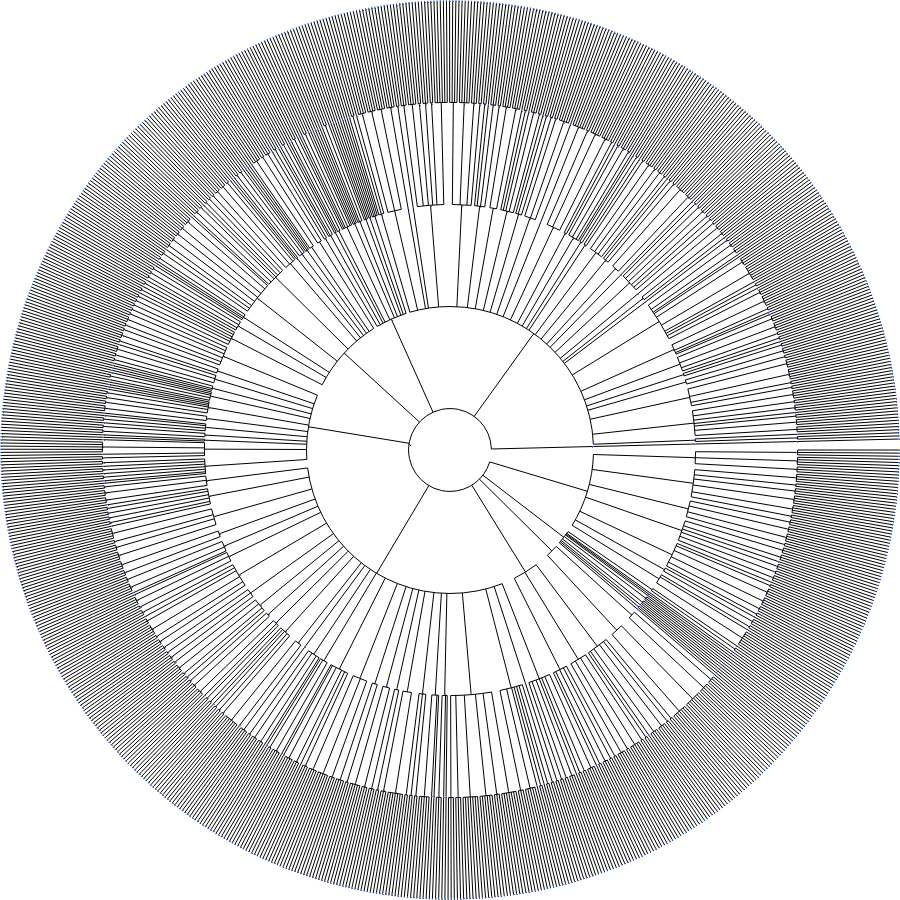

In [18]:

from ete3 import Tree, TreeStyle, NodeStyle

ete3_tree = Tree(cluster_tree.to_newick(max_depth=3), format=8)

ts = TreeStyle()
ts.show_leaf_name = False
ts.show_branch_length = False
ts.show_scale = False
ts.mode = "c"  # Circular layout
ts.root_opening_factor = 0.1

ete3_tree.render("%%inline", tree_style=ts, h=900, w=900)